In [23]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image

Silakan Unggah Gambar:


Saving garis.jpg to garis (18).jpg
File garis (18).jpg diunggah


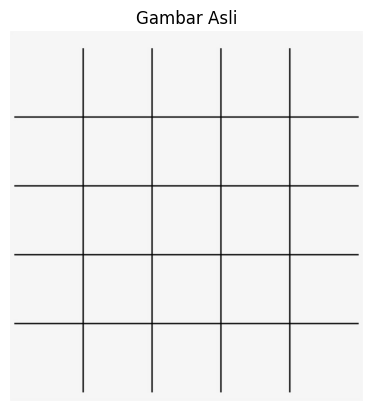

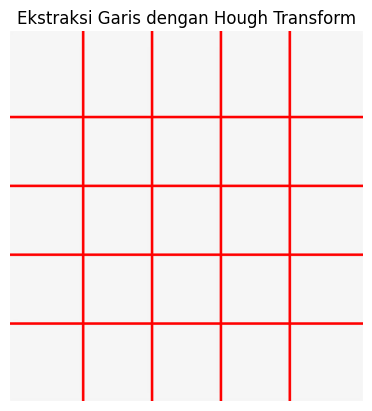


Analisis:
Program ini mengunggah gambar, menampilkannya, dan mendeteksi garis menggunakan Hough Transform.
Fungsi upload_image() mengunggah gambar, tetapi hanya mengembalikan nama file pertama yang diunggah.
Fungsi display_original_image() menampilkan gambar asli, sementara fungsi hough_line_detection() menerapkan Hough Transform
untuk mendeteksi garis dan menggambar garis tersebut pada gambar. Program ini dapat dikembangkan dengan validasi input,
penanganan kesalahan, dan fleksibilitas parameter deteksi garis agar lebih robust dalam menghadapi berbagai jenis gambar.


In [44]:
def upload_image():
    # Unggah file gambar menggunakan Google Colab
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'File {filename} diunggah')
        return filename

def display_original_image(image_path):
    # Menampilkan gambar asli
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')
    plt.show()

# 1. Ekstraksi Garis dengan Hough Transform
def hough_line_detection(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Ekstraksi Garis dengan Hough Transform')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Silakan Unggah Gambar:")
    image_path = upload_image()
    if image_path:
        display_original_image(image_path)
        hough_line_detection(image_path)

    print("\nAnalisis:")
    print("Program ini mengunggah gambar, menampilkannya, dan mendeteksi garis menggunakan Hough Transform.")
    print("Fungsi upload_image() mengunggah gambar, tetapi hanya mengembalikan nama file pertama yang diunggah.")
    print("Fungsi display_original_image() menampilkan gambar asli, sementara fungsi hough_line_detection() menerapkan Hough Transform")
    print("untuk mendeteksi garis dan menggambar garis tersebut pada gambar. Program ini dapat dikembangkan dengan validasi input,")
    print("penanganan kesalahan, dan fleksibilitas parameter deteksi garis agar lebih robust dalam menghadapi berbagai jenis gambar.")

Silakan Unggah Gambar:


Saving lamp.jpeg to lamp (7).jpeg
File lamp (7).jpeg diunggah
Unggah file template


Saving lamp.jpeg to lamp (8).jpeg
File lamp (8).jpeg diunggah


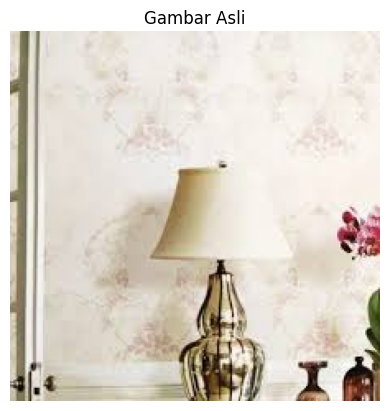

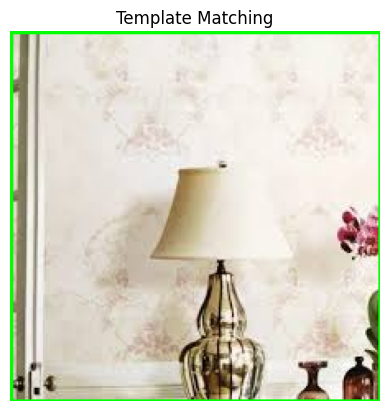


Analisis:
Program ini mengunggah gambar dan template untuk melakukan template matching, yang digunakan untuk mendeteksi objek dalam gambar.
Fungsi upload_image() mengunggah file gambar utama dan template, sementara fungsi display_original_image() menampilkan gambar asli.
Fungsi template_matching() melakukan pencocokan template dengan gambar, menggambar kotak hijau di sekitar area yang cocok.
Program ini mengasumsikan bahwa template cocok dengan objek dalam gambar pada tingkat kecocokan (threshold) 0.8 atau lebih.
Namun, program ini bisa dikembangkan dengan menambahkan pengecekan untuk memastikan template yang diunggah valid serta penanganan kesalahan jika gambar atau template tidak ditemukan.


In [45]:
def upload_image():
    # Unggah file gambar menggunakan Google Colab
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'File {filename} diunggah')
        return filename

def display_original_image(image_path):
    # Menampilkan gambar asli
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')
    plt.show()

# 2. Template Matching untuk Deteksi Objek
def template_matching(image_path, template_path):
    img = cv2.imread(image_path)
    template = cv2.imread(template_path)
    h, w = template.shape[:2]

    res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where(res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Template Matching')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Silakan Unggah Gambar:")
    image_path = upload_image()
    if image_path:
        print("Unggah file template")
        template_path = upload_image()
        display_original_image(image_path)
        if template_path:
            template_matching(image_path, template_path)

    print("\nAnalisis:")
    print("Program ini mengunggah gambar dan template untuk melakukan template matching, yang digunakan untuk mendeteksi objek dalam gambar.")
    print("Fungsi upload_image() mengunggah file gambar utama dan template, sementara fungsi display_original_image() menampilkan gambar asli.")
    print("Fungsi template_matching() melakukan pencocokan template dengan gambar, menggambar kotak hijau di sekitar area yang cocok.")
    print("Program ini mengasumsikan bahwa template cocok dengan objek dalam gambar pada tingkat kecocokan (threshold) 0.8 atau lebih.")
    print("Namun, program ini bisa dikembangkan dengan menambahkan pengecekan untuk memastikan template yang diunggah valid serta penanganan kesalahan jika gambar atau template tidak ditemukan.")

Silakan Unggah Gambar:


Saving chair.jpeg to chair (2).jpeg
File chair (2).jpeg diunggah


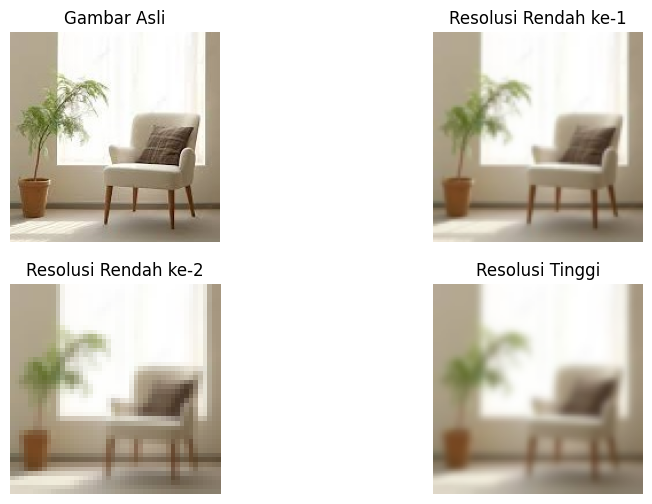


Analisis:
Program ini mengunggah gambar dan kemudian membuat pyramid gambar untuk menunjukkan berbagai resolusi.
Fungsi upload_image() digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi image_pyramid()
akan membuat beberapa tingkatan resolusi gambar menggunakan teknik pyrDown untuk menurunkan resolusi dan pyrUp
untuk meningkatkan resolusi kembali. Gambar dengan berbagai resolusi ini ditampilkan dalam bentuk subplot.
Program ini memberikan gambaran visual bagaimana pyramid gambar bekerja, yang berguna dalam berbagai aplikasi
seperti deteksi objek pada berbagai skala dan kompresi gambar.


In [46]:
def upload_image():
    # Unggah file gambar menggunakan Google Colab
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'File {filename} diunggah')
        return filename

# 3. Pembuatan Pyramid Gambar
def image_pyramid(image_path):
    img = cv2.imread(image_path)

    lower_reso1 = cv2.pyrDown(img)
    lower_reso2 = cv2.pyrDown(lower_reso1)
    higher_reso = cv2.pyrUp(lower_reso2)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(lower_reso1, cv2.COLOR_BGR2RGB))
    plt.title('Resolusi Rendah ke-1')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(lower_reso2, cv2.COLOR_BGR2RGB))
    plt.title('Resolusi Rendah ke-2')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(higher_reso, cv2.COLOR_BGR2RGB))
    plt.title('Resolusi Tinggi')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Silakan Unggah Gambar:")
    image_path = upload_image()
    if image_path:
        image_pyramid(image_path)

    print("\nAnalisis:")
    print("Program ini mengunggah gambar dan kemudian membuat pyramid gambar untuk menunjukkan berbagai resolusi.")
    print("Fungsi upload_image() digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi image_pyramid()")
    print("akan membuat beberapa tingkatan resolusi gambar menggunakan teknik pyrDown untuk menurunkan resolusi dan pyrUp")
    print("untuk meningkatkan resolusi kembali. Gambar dengan berbagai resolusi ini ditampilkan dalam bentuk subplot.")
    print("Program ini memberikan gambaran visual bagaimana pyramid gambar bekerja, yang berguna dalam berbagai aplikasi")
    print("seperti deteksi objek pada berbagai skala dan kompresi gambar.")

Silakan Unggah Gambar:


Saving lingkaran.jpeg to lingkaran (3).jpeg
File lingkaran (3).jpeg diunggah


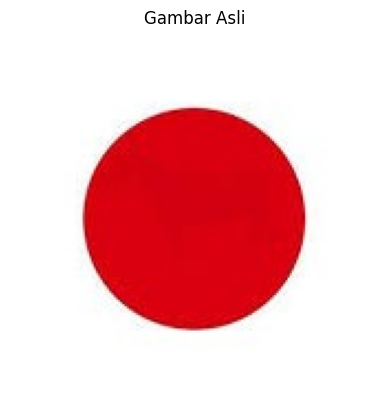

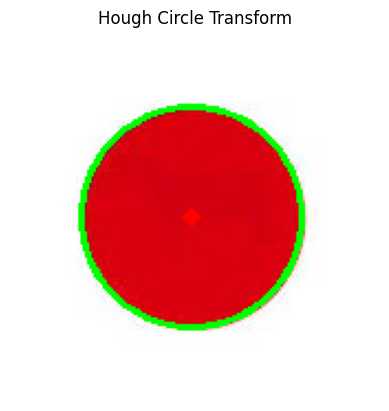


Analisis:
Program ini mengunggah gambar dan kemudian mendeteksi lingkaran menggunakan metode Hough Circle Transform.
Fungsi `upload_image()` digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi `hough_circle_detection()`
akan memproses gambar dalam format grayscale dan kemudian menerapkan filter median untuk mengurangi noise.
Setelah itu, fungsi `cv2.HoughCircles()` digunakan untuk mendeteksi lingkaran dalam gambar. Hasilnya adalah gambar
dengan lingkaran yang terdeteksi ditandai dengan warna hijau dan titik tengah lingkaran ditandai dengan warna merah.
Metode ini berguna dalam aplikasi seperti deteksi objek berbentuk lingkaran, seperti tanda jalan atau objek bulat lainnya.


In [48]:
def upload_image():
    # Unggah file gambar menggunakan Google Colab
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'File {filename} diunggah')
        return filename

def display_original_image(image_path):
    # Menampilkan gambar asli
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')
    plt.show()

# 4. Deteksi Lingkaran Menggunakan Hough Transform
def hough_circle_detection(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)

    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Hough Circle Transform')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Silakan Unggah Gambar:")
    image_path = upload_image()
    if image_path:
        display_original_image(image_path)
        hough_circle_detection(image_path)

    print("\nAnalisis:")
    print("Program ini mengunggah gambar dan kemudian mendeteksi lingkaran menggunakan metode Hough Circle Transform.")
    print("Fungsi `upload_image()` digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi `hough_circle_detection()`")
    print("akan memproses gambar dalam format grayscale dan kemudian menerapkan filter median untuk mengurangi noise.")
    print("Setelah itu, fungsi `cv2.HoughCircles()` digunakan untuk mendeteksi lingkaran dalam gambar. Hasilnya adalah gambar")
    print("dengan lingkaran yang terdeteksi ditandai dengan warna hijau dan titik tengah lingkaran ditandai dengan warna merah.")
    print("Metode ini berguna dalam aplikasi seperti deteksi objek berbentuk lingkaran, seperti tanda jalan atau objek bulat lainnya.")

Silakan Unggah Gambar:


Saving home.jpeg to home (6).jpeg
File home (6).jpeg diunggah


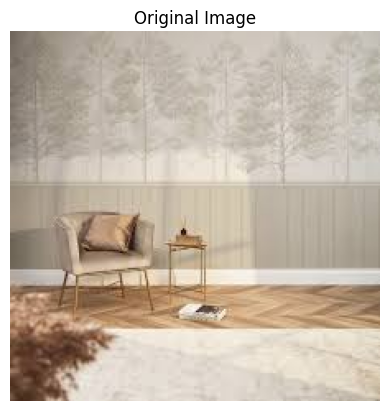

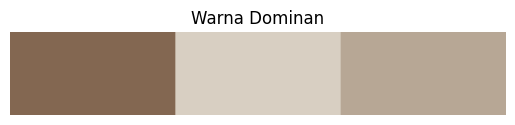


Analisis:
Program ini mengunggah gambar dan kemudian mengekstrak warna dominan menggunakan metode K-Means Clustering.
Fungsi `upload_image()` digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi `extract_dominant_color()`
akan mengubah gambar menjadi format RGB dan merubahnya menjadi bentuk vektor untuk analisis warna.
Selanjutnya, metode KMeans digunakan untuk mengelompokkan warna gambar menjadi beberapa kluster, dan warna dominan
dari setiap kluster akan ditampilkan dalam bentuk rectangle yang menunjukkan warna yang paling sering muncul.
Program ini sangat berguna untuk aplikasi yang melibatkan analisis warna, seperti pengenalan objek berdasarkan warna.


In [49]:
def upload_image():
    # Unggah file gambar menggunakan Google Colab
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'File {filename} diunggah')
        return filename

def display_original_image(image_path):
    # Menampilkan gambar asli
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

# 5. Ekstraksi Warna Dominan pada Gambar
def extract_dominant_color(image_path, k=3):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = img_rgb.reshape((-1, 3))

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img_resized)
    colors = kmeans.cluster_centers_

    def plot_colors(colors):
        rect = np.zeros((50, 300, 3), dtype=np.uint8)
        step = 300 // k
        for i, color in enumerate(colors):
            rect[:, i*step:(i+1)*step] = color
        return rect

    color_rect = plot_colors(colors)
    plt.imshow(color_rect)
    plt.axis('off')
    plt.title('Warna Dominan')
    plt.show()

if __name__ == "__main__":
    print("Silakan Unggah Gambar:")
    image_path = upload_image()
    if image_path:
        display_original_image(image_path)
        extract_dominant_color(image_path)

    print("\nAnalisis:")
    print("Program ini mengunggah gambar dan kemudian mengekstrak warna dominan menggunakan metode K-Means Clustering.")
    print("Fungsi `upload_image()` digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi `extract_dominant_color()`")
    print("akan mengubah gambar menjadi format RGB dan merubahnya menjadi bentuk vektor untuk analisis warna.")
    print("Selanjutnya, metode KMeans digunakan untuk mengelompokkan warna gambar menjadi beberapa kluster, dan warna dominan")
    print("dari setiap kluster akan ditampilkan dalam bentuk rectangle yang menunjukkan warna yang paling sering muncul.")
    print("Program ini sangat berguna untuk aplikasi yang melibatkan analisis warna, seperti pengenalan objek berdasarkan warna.")

Silakan Unggah Gambar:


Saving laptop.jpeg to laptop (1).jpeg
File laptop (1).jpeg diunggah


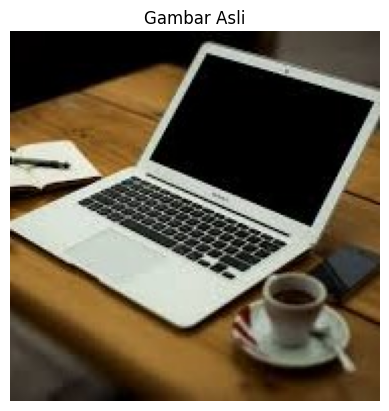

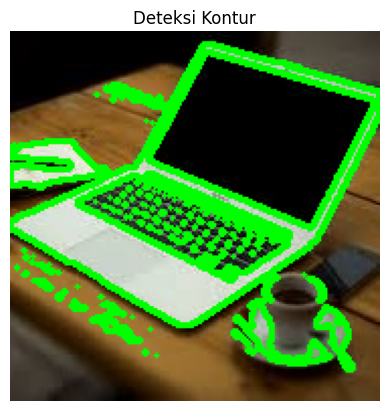


Analisis:
Program ini mengunggah gambar dan kemudian melakukan deteksi kontur pada gambar tersebut.
Fungsi `upload_image()` digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi `contour_detection()`
akan mengubah gambar menjadi grayscale, kemudian menggunakan thresholding untuk mendeteksi area yang kontras.
Setelah itu, kontur-kontur yang terdeteksi digambar pada gambar asli dengan warna hijau.
Kontur dapat membantu dalam aplikasi seperti pengenalan bentuk, segmentasi objek, dan analisis citra.


In [50]:
def upload_image():
    # Unggah file gambar menggunakan Google Colab
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'File {filename} diunggah')
        return filename

def display_original_image(image_path):
    # Menampilkan gambar asli
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')
    plt.show()

# 6. Deteksi Kontur pada Gambar
def contour_detection(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Deteksi Kontur')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    print("Silakan Unggah Gambar:")
    image_path = upload_image()
    if image_path:
        display_original_image(image_path)
        contour_detection(image_path)

    print("\nAnalisis:")
    print("Program ini mengunggah gambar dan kemudian melakukan deteksi kontur pada gambar tersebut.")
    print("Fungsi `upload_image()` digunakan untuk mengunggah gambar utama. Setelah gambar diunggah, fungsi `contour_detection()`")
    print("akan mengubah gambar menjadi grayscale, kemudian menggunakan thresholding untuk mendeteksi area yang kontras.")
    print("Setelah itu, kontur-kontur yang terdeteksi digambar pada gambar asli dengan warna hijau.")
    print("Kontur dapat membantu dalam aplikasi seperti pengenalan bentuk, segmentasi objek, dan analisis citra.")